In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels as st
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

Lendo o dataset e dropnado os NaN. Neste caso podemos simplesmente retirar os dados NaN do dataset devido a sua natureza: estes dados estão todos no final do dataset e são relativos a dados futuros que ainda não estão disponíveis, isso acontece devido a natureza da coleta de dados e formato entregue pelo site. 

In [11]:
dataset = pd.read_csv('../bases/Crude_Oil.csv')
dataset.rename(columns={' Value': 'value' },inplace=True)
dataset.dropna(inplace=True)


Agrupando os dados por mês

In [12]:
dataset.Date = pd.to_datetime(dataset.Date)
dataset['year'] = dataset.Date.dt.year
dataset['month'] = dataset.Date.dt.month
grouped_df = dataset.groupby(['year', 'month']).mean()
grouped_df

C:\Users\User\AppData\Local\Temp\ipykernel_14068\1269507361.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = dataset.groupby(['year', 'month']).mean()


value
year month           
2010 3      81.485000
     4      84.292857
     5      73.743500
     6      75.335909
     7      76.319524
...               ...
2022 11     84.085000
     12     76.848636
2023 1      78.313636
     2      76.845000
     3      78.492500

[157 rows x 1 columns]

Comportamento do dataset agrupado por mês:

<Axes: >

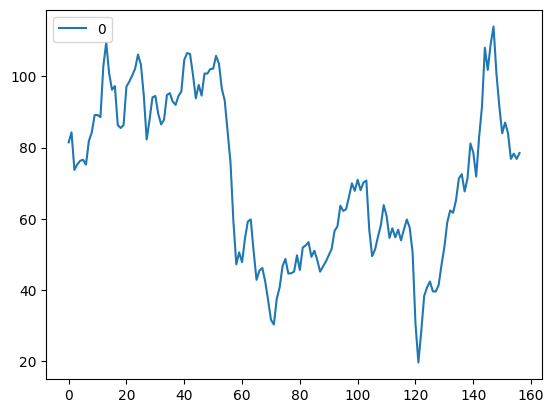

In [14]:
sns.lineplot(grouped_df.values)

verificar aqui como é feito o time series decompose (serie, trend, error)

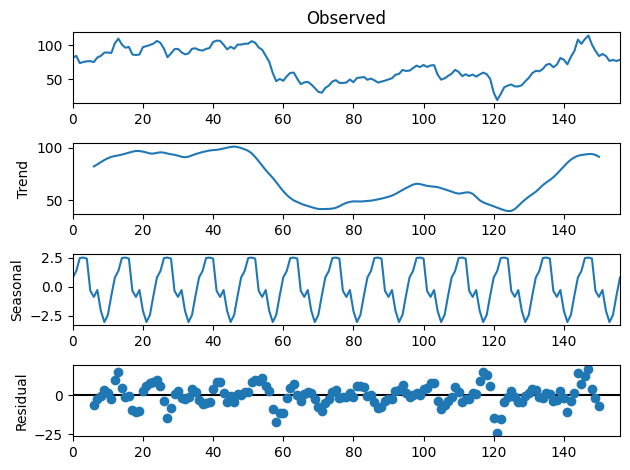

In [15]:
dataset.Date = pd.to_datetime(dataset.Date)

result = seasonal_decompose(grouped_df.values, model='add', period=12)
result.plot()
pyplot.show()